<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Simple One Hidden Layer Neural Network</h1>

<h2>Table of Contents</h2>
<p>In this lab, you will use a single-layer neural network to classify non linearly seprable data in 1-Ddatabase.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define the Neural Network, Criterion Function, Optimizer, and Train the Model</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>

<h2>Preparation</h2>

We'll need the following libraries

In [3]:
# Import the libraries we need for this lab

import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

In [2]:
import torch
import torch.nn as nn
from torch import sigmoid
import numpy as np

torch.manual_seed(0)

Used for plotting the model

In [4]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

<!--Empty Space for separating topics-->

<h2 id="Model">Neural Network Module and Training Function</h2> 

Define the activations and the output of the first linear layer as an attribute. Note that this is not good practice. 

In [19]:
# Define the class Net

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2=None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [12]:
class Net(nn.Module):
    
    def __init__(self, input_size, hiden_size, output_size):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(input_size, hiden_size)
        self.linear2 = nn.Linear(hiden_size, output_size)
        
    def forward(self, x):
        x = sigmoid(self.linear1(x))
        x = sigmoid(self.linear2(x))
        return x

In [22]:
def train(Y, X, model, optimizer, criterion, epochs=1000):
    
    cost=[]
    total_loss=0
    
    for epoch in range(epochs):
        for x, y in zip(X, Y):
            yhat = model(x)
            loss = criterion(yhat, y)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        cost.append(total_loss)

        if epoch % 300 == 0:    
                PlotStuff(X, Y, model, epoch, leg=True)
                plt.show()
                model(X)
                plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
                plt.title('activations')
                plt.show()
    
    return cost

Define the training function:

In [16]:
# Define the training function

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss 
            total+=loss.item() 
            
        cost.append(total)
        if epoch % 300 == 0:    
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2>

In [ ]:
# Make some data

X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [25]:
X = torch.arange(-20, 20, 1).view(-1,1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0


<!--Empty Space for separating topics-->

<h2 id="Train">Define the Neural Network, Criterion Function, Optimizer and Train the Model</h2>

Create the Cross-Entropy loss function: 

In [26]:
# The loss function

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

In [27]:

# define binary cross entropy

def criterion_cross(outputs, labels):
    return -1 * torch.mean(labels * torch.log(outputs) + (1-labels) * torch.log(1-outputs))

Define the Neural Network, Optimizer, and Train the Model:

In [ ]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

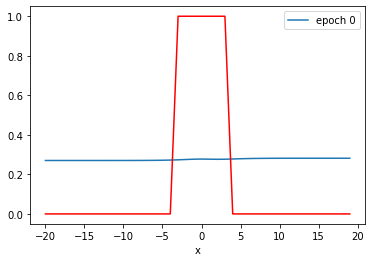

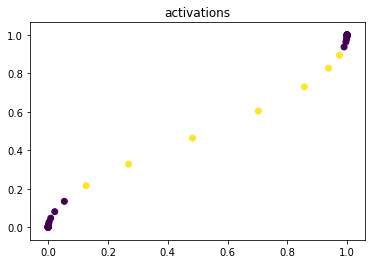

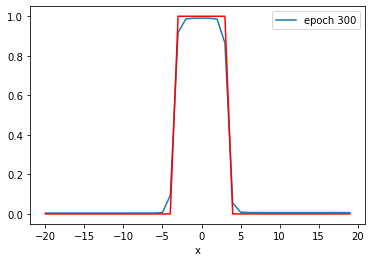

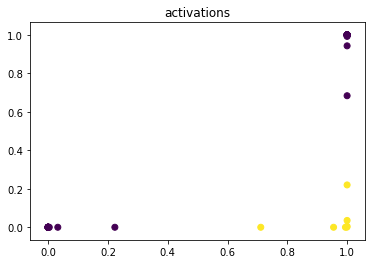

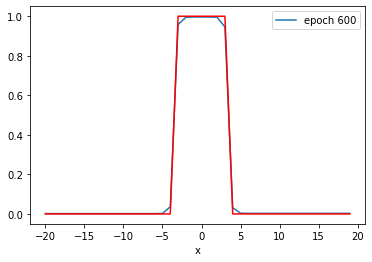

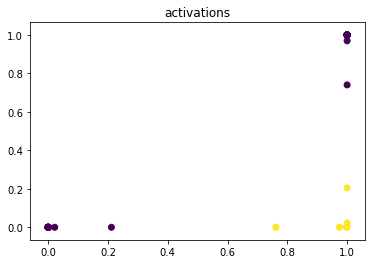

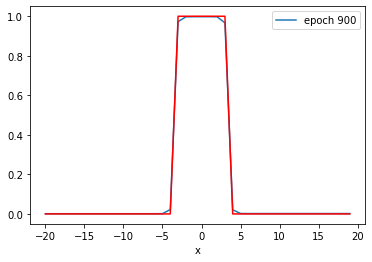

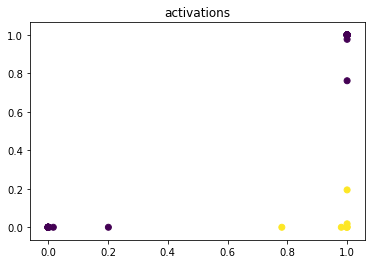

Text(0.5, 1.0, 'cross entropy loss')

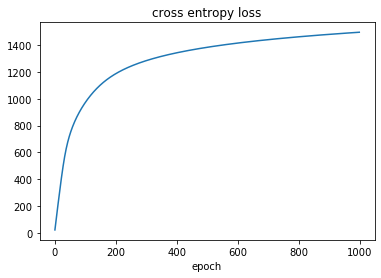

In [28]:
model = Net(1, 2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

cost_cross = train(Y, X, model, optimizer, criterion_cross,  epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

By examining the output of the  activation, you see by the 600th epoch that the data has been mapped to a linearly separable space.

we can make a prediction for a arbitrary one tensors 

In [29]:
x=torch.tensor([0.0])
yhat=model(x)
yhat

tensor([0.9980], grad_fn=<SigmoidBackward>)

we can make a prediction for some arbitrary one tensors  

In [30]:
X_=torch.tensor([[0.0],[2.0],[3.0]])
Yhat=model(X_)
Yhat

tensor([[0.9980],
        [0.9975],
        [0.9707]], grad_fn=<SigmoidBackward>)

we  can threshold the predication

In [31]:
Yhat=Yhat>0.5
Yhat

tensor([[True],
        [True],
        [True]])

<h3>Practice</h3>

Repeat the previous steps above by using the MSE cost or total loss: 


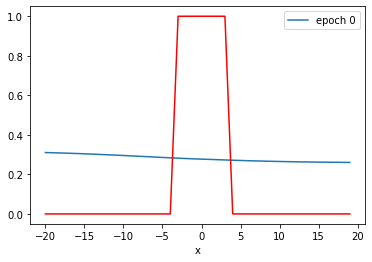

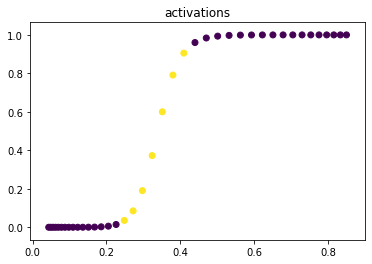

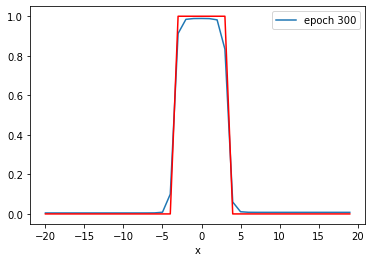

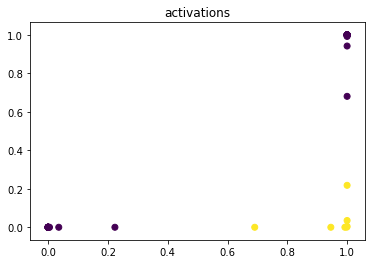

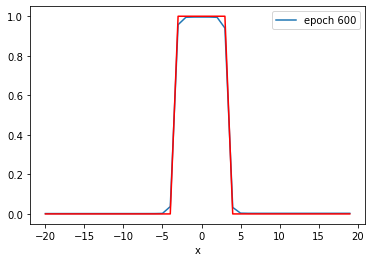

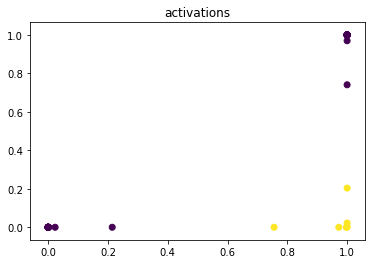

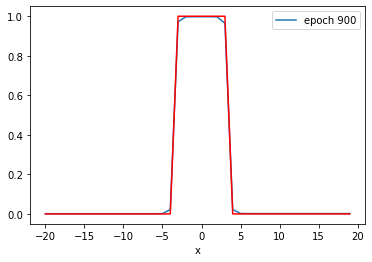

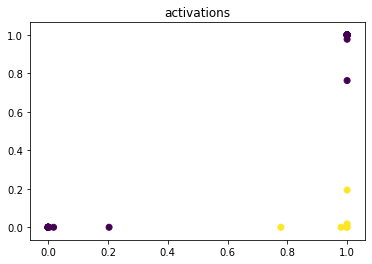

[22.563747853040695,
 41.87194161117077,
 60.70842805504799,
 79.4559296965599,
 98.1826037466526,
 116.90358926355839,
 135.62226748466492,
 154.33875384181738,
 173.05206494778395,
 191.7607687264681,
 210.46319045126438,
 229.1574646383524,
 247.84153621643782,
 266.51314257085323,
 285.16980067640543,
 303.8088141530752,
 322.4273097515106,
 341.0223124474287,
 359.59084882587194,
 378.1300763487816,
 396.6374153867364,
 415.11066730320454,
 433.5480899140239,
 451.9483729302883,
 470.3104860410094,
 488.63341395556927,
 506.91585271060467,
 525.1560279801488,
 543.3516864478588,
 561.5002251341939,
 579.5988456681371,
 597.6446576192975,
 615.634728744626,
 633.5660823658109,
 651.4356857687235,
 669.2404246255755,
 686.9770680516958,
 704.64222638309,
 722.2322883307934,
 739.7433352768421,
 757.1710228994489,
 774.5104268416762,
 791.7558393403888,
 808.9005282074213,
 825.9364635050297,
 842.8540340438485,
 859.6417855024338,
 876.286222666502,
 892.771743953228,
 909.080742821

In [34]:
# Practice: Train the model with MSE Loss Function
X = torch.arange(-20, 20, 1).view(-1,1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

model = Net(1,2,1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Type your code here
def mse_criterion(y_hat, y):
    return torch.mean((y_hat - y) ** 2)

train(Y, X, model, optimizer, criterion_cross,  epochs=1000)

In [40]:
x = torch.tensor([[10.],[3.],[6.]])
model(x)

tensor([[0.0016],
        [0.9690],
        [0.0016]], grad_fn=<SigmoidBackward>)

Double-click <b>here</b> for the solution.

<!-- 
learning_rate = 0.1
criterion_mse=nn.MSELoss()
model=Net(D_in,H,D_out)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
cost_mse=train(Y,X,model,optimizer,criterion_mse,epochs=1000)
plt.plot(cost_mse)
plt.xlabel('epoch')
plt.title('MSE loss ')
-->

<!--Empty Space for separating topics-->

<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />
</a>

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.